### 
This script loads and displays previously saved emotion analysis results from pickle file.
The analysis includes domain analysis, temporal patterns, and response effectiveness metrics
of conversation data that was processed using the EmoRoBERTa model 
###


In [2]:
import pickle
import json
import pandas as pd
from collections import defaultdict

# Load the saved results
save_dir = "emotion_analysis_results"
with open(f"{save_dir}/analysis_results.pkl", "rb") as f:
    analysis_results = pickle.load(f)

# Convert back to original formats
conversations = analysis_results['conversations']
conv_df = pd.DataFrame.from_dict(analysis_results['conv_df'])
temporal_patterns_dict = analysis_results['temporal_patterns']
temporal_patterns = pd.DataFrame(temporal_patterns_dict)
domain_stats = analysis_results['domain_stats']
response_effectiveness = analysis_results['response_effectiveness']

print("All results loaded successfully!")

# Print Domain Analysis
print("\nDomain Analysis:")
for domain, stats in domain_stats.items():
    print(f"\n{domain.upper()}:")
    print(f"Count: {stats['count']}")
    print(f"Apology Rate: {stats['apology_rate']/stats['count']*100:.1f}%")

# Print Temporal Patterns
print("\nTemporal Patterns:")
print(temporal_patterns)

# Print Response Effectiveness
print("\nResponse Effectiveness:")
for pattern, stats in response_effectiveness.items():
    improvement_rate = (stats['improvement_rate'] / stats['total_occurrences'] * 100
                       if stats['total_occurrences'] > 0 else 0)
    print(f"\n{pattern}:")
    print(f"Improvement Rate: {improvement_rate:.1f}%")

# Print overall statistics
print("\nOverall Analysis Summary:")
print(f"Total conversations analyzed: {len(conversations)}")
print(f"Conversations with apologies: {sum(1 for c in conversations if c['contains_apology'])}")

All results loaded successfully!

Domain Analysis:

ANALYSIS:
Count: 8
Apology Rate: 25.0%

WRITING:
Count: 35
Apology Rate: 34.3%

TECHNICAL:
Count: 37
Apology Rate: 37.8%

EXPLANATION:
Count: 32
Apology Rate: 34.4%

Temporal Patterns:
         negative_count_mean  negative_count_max  contains_apology_mean  \
2024-05             1.200000                   2               0.400000   
2024-06             1.083333                   2               0.333333   
2024-07             1.166667                   2               0.400000   
2024-08             1.166667                   4               0.333333   
2024-09             1.200000                   2               0.200000   

         response_similarity_mean  
2024-05                  0.778694  
2024-06                  0.755690  
2024-07                  0.790417  
2024-08                  0.784697  
2024-09                  0.781329  

Response Effectiveness:

detailed:
Improvement Rate: 81.6%

explanatory:
Improvement Rate: 72.5

In [4]:
print("\nAnalysis Summary:")
print(f"Total conversations analyzed: {len(conversations)}")
print(f"Conversations with apologies: {sum(1 for c in conversations if c['contains_apology'])}")
# Calculate and print emotion distributions
all_emotions = []
for conv in conversations:
    all_emotions.extend([e['emotion'] for e in conv['emotions']])

emotion_dist = pd.Series(all_emotions).value_counts()
print("\nEmotion Distribution:")
for emotion, count in emotion_dist.items():
    print(f"{emotion}: {count} ({count/len(all_emotions)*100:.1f}%)")


Analysis Summary:
Total conversations analyzed: 112
Conversations with apologies: 39

Emotion Distribution:
neutral: 388 (54.6%)
approval: 44 (6.2%)
anger: 38 (5.4%)
curiosity: 35 (4.9%)
fear: 32 (4.5%)
sadness: 32 (4.5%)
disgust: 28 (3.9%)
disapproval: 27 (3.8%)
admiration: 16 (2.3%)
desire: 13 (1.8%)
realization: 9 (1.3%)
confusion: 7 (1.0%)
gratitude: 6 (0.8%)
caring: 6 (0.8%)
disappointment: 4 (0.6%)
annoyance: 4 (0.6%)
remorse: 3 (0.4%)
amusement: 3 (0.4%)
surprise: 2 (0.3%)
embarrassment: 2 (0.3%)
excitement: 2 (0.3%)
joy: 2 (0.3%)
nervousness: 2 (0.3%)
optimism: 2 (0.3%)
grief: 1 (0.1%)
pride: 1 (0.1%)
love: 1 (0.1%)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import pearsonr

# ---------------------------
# 1. Interactive Conversation Emotion Trajectory
# ---------------------------
print("Interactive Conversation Emotion Trajectory:")
# Create a dropdown of conversation IDs
conversation_ids = [conv['conversation_id'] for conv in conversations]

def plot_conversation_emotions(conv_id):
    # Retrieve the conversation by ID
    conv = next((c for c in conversations if c['conversation_id'] == conv_id), None)
    if conv is None:
        print("Conversation not found.")
        return
    # Extract the emotion sequence
    emotion_sequence = [e['emotion'] for e in conv['emotions']]
    # For visualization, mark negative emotions as 1 and others as 0
    negative_flags = [1 if e in ['anger', 'sadness', 'disgust', 'fear'] else 0 for e in emotion_sequence]
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(negative_flags) + 1), negative_flags, marker='o')
    plt.title(f"Negative Emotion Progression in Conversation {conv_id}")
    plt.xlabel("Message Index")
    plt.ylabel("Negative Emotion (1 if negative, else 0)")
    plt.ylim(-0.1, 1.1)
    plt.show()

# Create an interactive widget
dropdown = widgets.Dropdown(options=conversation_ids, description='Conv ID:')
widgets.interactive(plot_conversation_emotions, conv_id=dropdown)

Interactive Conversation Emotion Trajectory:


interactive(children=(Dropdown(description='Conv ID:', options=(1138, 4103, 4335, 5042, 8691, 11144, 14510, 22…

# 2. Domain-specific Emotion Distribution


Domain-specific Emotion Distribution:


/tmp/ipykernel_177535/2109134188.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


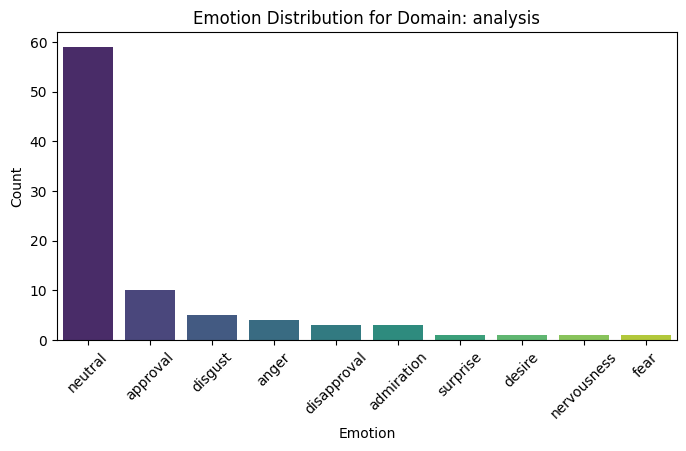

/tmp/ipykernel_177535/2109134188.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


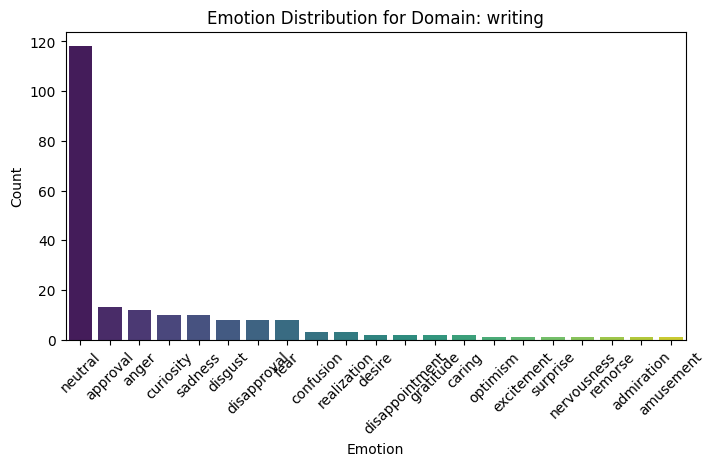

/tmp/ipykernel_177535/2109134188.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


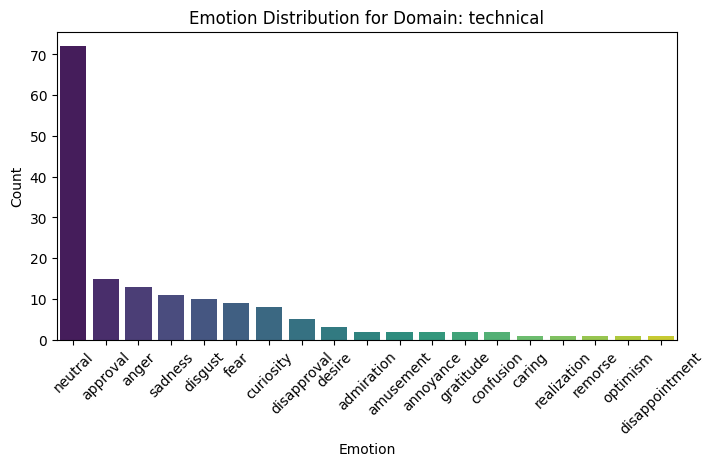

/tmp/ipykernel_177535/2109134188.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


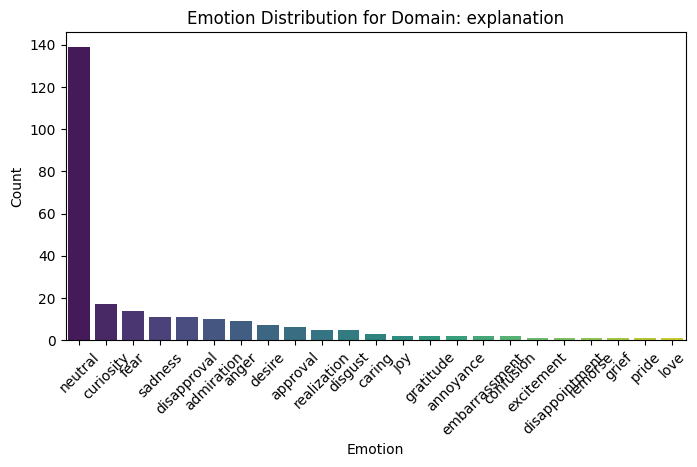

In [6]:
print("\nDomain-specific Emotion Distribution:")
# For each domain (technical, writing, analysis, explanation), plot the emotion counts.
for domain, stats in domain_stats.items():
    emotion_list = stats['emotion_patterns']
    emotion_counts = pd.Series(emotion_list).value_counts()
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")
    plt.title(f"Emotion Distribution for Domain: {domain}")
    plt.xlabel("Emotion")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


# 3. Conversation Length vs. Cumulative Negative Emotions


Conversation Length vs. Cumulative Negative Emotions:


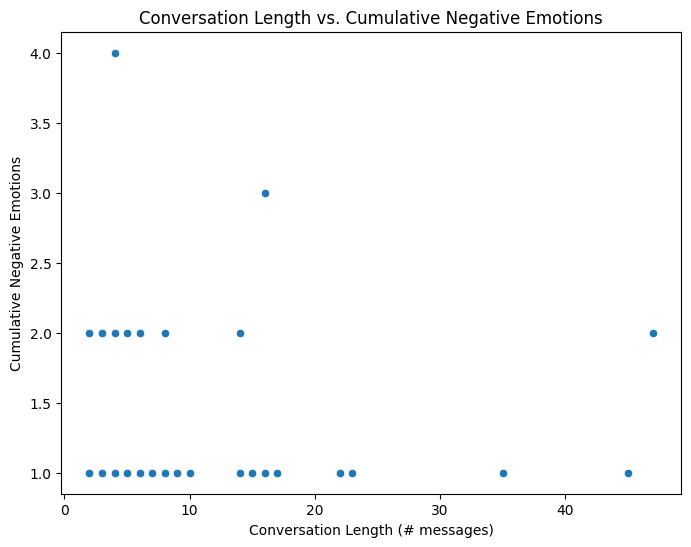

Pearson correlation coefficient: 0.10 (p-value: 0.314)


In [7]:
print("\nConversation Length vs. Cumulative Negative Emotions:")
# Compute conversation length (number of user messages) and the cumulative negative emotion count
conversation_lengths = [len(conv['messages']) for conv in conversations]
negative_counts = [conv['negative_count'] for conv in conversations]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=conversation_lengths, y=negative_counts)
plt.xlabel("Conversation Length (# messages)")
plt.ylabel("Cumulative Negative Emotions")
plt.title("Conversation Length vs. Cumulative Negative Emotions")
plt.show()

# Calculate and print Pearson correlation coefficient
corr_coef, p_value = pearsonr(conversation_lengths, negative_counts)
print(f"Pearson correlation coefficient: {corr_coef:.2f} (p-value: {p_value:.3f})")

###
the data does not support a strong or significant link between how long a conversation goes on and how many negative emotions arise
###

# 4. Temporal Trends in Negative Emotions and Apology Rates


Temporal Trends in Negative Emotions and Apology Rates:


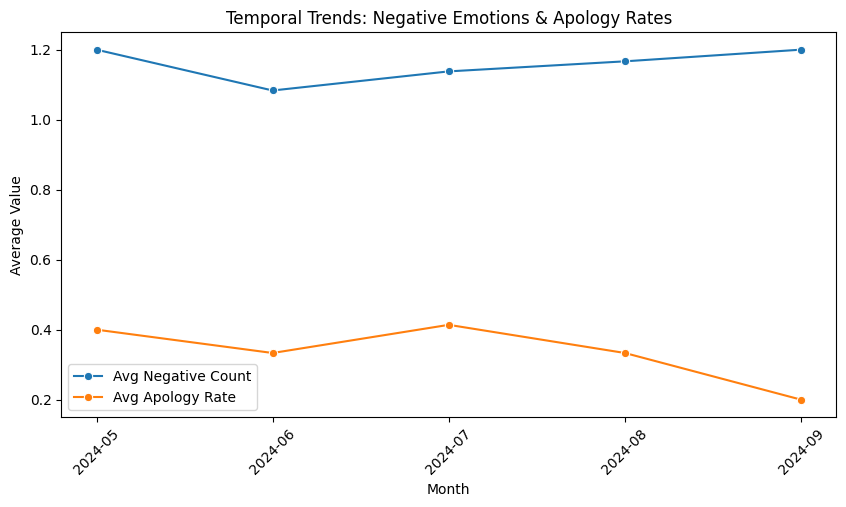

In [9]:
print("\nTemporal Trends in Negative Emotions and Apology Rates:")
# Ensure the conversation DataFrame has a proper 'month' column.
# (If not already, we parse the 'timestamp' field.)
conv_df['month'] = pd.to_datetime(conv_df['timestamp'], errors='coerce').dt.strftime('%Y-%m')

# Group by month to get average negative count and apology rate
temporal_summary = conv_df.groupby('month').agg({
    'negative_count': 'mean',
    'contains_apology': 'mean'
}).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=temporal_summary, x='month', y='negative_count', marker='o', label='Avg Negative Count')
sns.lineplot(data=temporal_summary, x='month', y='contains_apology', marker='o', label='Avg Apology Rate')
plt.title("Temporal Trends: Negative Emotions & Apology Rates")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()

###
over these months, user messages or system responses are showing a slight increase in negativity while there is less apologetic language being used
###

# 5. Emotion Transition. 

###
How user emotions transition from one message to the next. For example, do users who start with “anger” often transition to “sadness”?
###

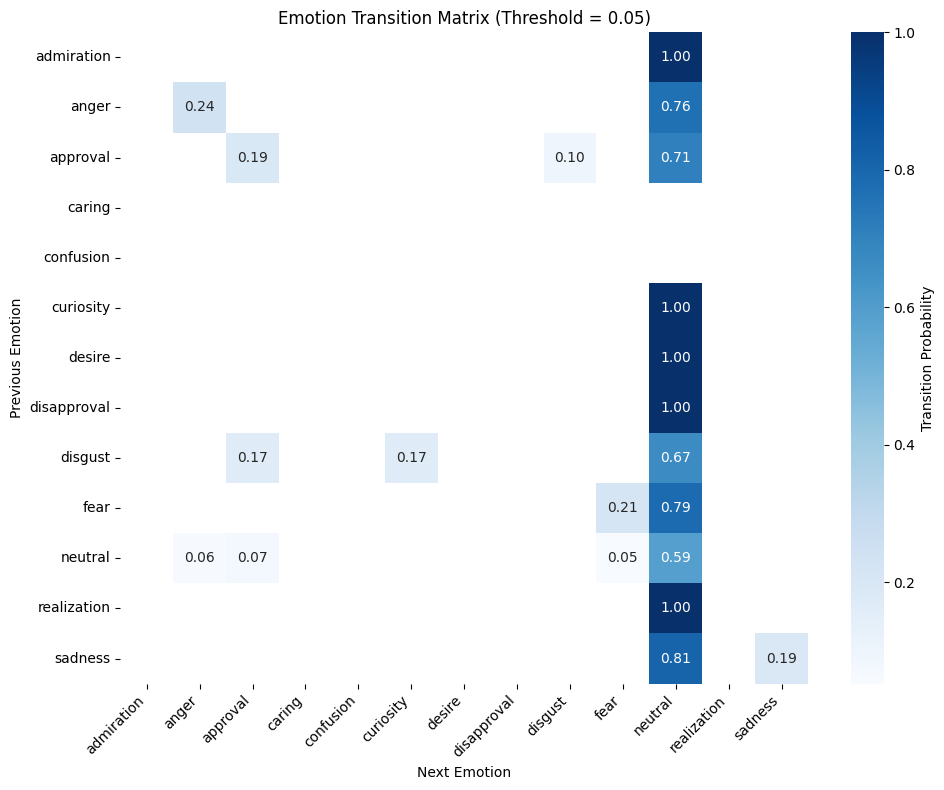

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

def build_emotion_transition_matrix(conversations, min_emotion_count=5, min_transition_count=3):
    """
    Build a transition matrix showing how user emotions transition from one message to the next.
    Filters out:
    - Emotions that occur fewer than `min_emotion_count` times in the dataset.
    - Transitions that occur fewer than `min_transition_count` times.
    
    Returns a DataFrame with normalized transition probabilities.
    """
    # Count total occurrences of each emotion
    emotion_counts = Counter()
    transition_counts = Counter()
    
    for conv in conversations:
        emotion_sequence = [e['emotion'] for e in conv['emotions']]
        
        for i in range(len(emotion_sequence) - 1):
            e1, e2 = emotion_sequence[i], emotion_sequence[i+1]
            emotion_counts[e1] += 1
            transition_counts[(e1, e2)] += 1

    # Filter out rare emotions
    valid_emotions = {e for e, count in emotion_counts.items() if count >= min_emotion_count}

    # Filter out rare transitions
    valid_transitions = {pair: count for pair, count in transition_counts.items() 
                         if pair[0] in valid_emotions and pair[1] in valid_emotions and count >= min_transition_count}

    # Create a sorted list of final emotions
    emotion_list = sorted(valid_emotions)

    # Build transition matrix
    transition_matrix = pd.DataFrame(0, index=emotion_list, columns=emotion_list)
    for (e1, e2), count in valid_transitions.items():
        transition_matrix.loc[e1, e2] = count

    # Normalize each row to represent probabilities
    transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0).fillna(0)

    return transition_matrix

def plot_transition_matrix_with_threshold(transition_matrix, threshold=0.05):
    """
    Plot a transition matrix but mask all values (probabilities) below `threshold`.
    This makes it easier to see only the strongest transitions.
    """
    # Create a copy to avoid mutating the original DataFrame
    tm_masked = transition_matrix.copy()
    
    # Mask probabilities below threshold by setting them to NaN
    tm_masked[tm_masked < threshold] = float('nan')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(tm_masked, annot=True, cmap="Blues", fmt=".2f", 
                mask=tm_masked.isna(),  # ensures masked cells show up blank
                cbar_kws={'label': 'Transition Probability'})
    
    plt.title(f"Emotion Transition Matrix (Threshold = {threshold})")
    plt.xlabel("Next Emotion")
    plt.ylabel("Previous Emotion")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# --------------------------
# Usage Example
# --------------------------

# 1. Build the transition matrix with filtering
transition_matrix = build_emotion_transition_matrix(conversations, min_emotion_count=5, min_transition_count=3)

# 2. Plot the matrix, hiding transitions below a 5% probability
plot_transition_matrix_with_threshold(transition_matrix, threshold=0.05)


"""
Key Trends from Emotion Transition Matrix (Threshold = 0.05)

1. Strongest Transitions (≥ 70% probability)
   - Realization → Realization (1.00): Users tend to remain in realization.
   - Curiosity → Curiosity (1.00): Curiosity often persists across multiple turns.
   - Desire → Desire (1.00): Users expressing desire stay in that emotion.
   - Neutral → Realization (0.81): Many users shift from a neutral state to realization.
   - Fear → Realization (0.79): Fear often leads to realization, possibly due to new insights.
   - Neutral → Neutral (0.67): Neutral is a common "steady state" emotion.

2. Moderate Transitions (20-50% probability)
   - Anger → Fear (0.24): Users feeling anger frequently shift into fear.
   - Disgust → Disapproval (0.17): Disgust often turns into disapproval.
   - Disgust → Fear (0.17): Some users escalate from disgust to fear.
   - Approval → Realization (0.19): Some users move from approval to realization.

3. Insights & Interpretation
   - Realization is a dominant outcome: Multiple emotions (neutral, fear, approval) transition into realization.
   - Negative escalations exist: Anger → Fear and Disgust → Disapproval show a pattern of increasing negativity.
   - Curiosity and Desire persist: Unlike other emotions, curiosity and desire tend to repeat in sequences.
   - Neutral state serves as a transition point: Many emotions shift into or remain in a neutral state.

"""


"""

# 6. Analysis of Apology Effect on Negative Emotions

###
Determine whether conversations with an apology end up with fewer negative emotions overall (or show improvement) compared to those without an apology
###

Apology Conversations - Negative Count Stats:
  Mean: 1.08, Std: 0.27
No Apology Conversations - Negative Count Stats:
  Mean: 1.21, Std: 0.52

T-test between apology vs. no-apology negative counts:
  T-statistic: -1.71, p-value: 0.090

Mann-Whitney U test between apology vs. no-apology negative counts:
  U-statistic: 1296.00, p-value: 0.189


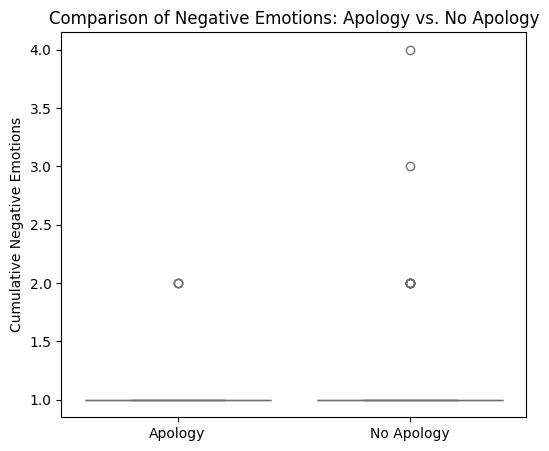

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

def compare_apology_vs_no_apology(conversations):
    """
    Compare the negative_count distribution in conversations 
    that contain an apology vs. those that do not.
    """
    apology_neg_counts = []
    no_apology_neg_counts = []
    
    for conv in conversations:
        if conv['contains_apology']:
            apology_neg_counts.append(conv['negative_count'])
        else:
            no_apology_neg_counts.append(conv['negative_count'])
    
    # Convert to arrays for statistical tests
    apology_neg_counts = np.array(apology_neg_counts)
    no_apology_neg_counts = np.array(no_apology_neg_counts)
    
    # Quick descriptive stats
    print("Apology Conversations - Negative Count Stats:")
    print(f"  Mean: {apology_neg_counts.mean():.2f}, Std: {apology_neg_counts.std():.2f}")
    print("No Apology Conversations - Negative Count Stats:")
    print(f"  Mean: {no_apology_neg_counts.mean():.2f}, Std: {no_apology_neg_counts.std():.2f}")
    
    # T-test (parametric)
    t_stat, p_val = ttest_ind(apology_neg_counts, no_apology_neg_counts, equal_var=False)
    print(f"\nT-test between apology vs. no-apology negative counts:")
    print(f"  T-statistic: {t_stat:.2f}, p-value: {p_val:.3f}")
    
    # Mann-Whitney U (non-parametric) for robustness
    u_stat, p_val_u = mannwhitneyu(apology_neg_counts, no_apology_neg_counts, alternative='two-sided')
    print(f"\nMann-Whitney U test between apology vs. no-apology negative counts:")
    print(f"  U-statistic: {u_stat:.2f}, p-value: {p_val_u:.3f}")
    
    # Boxplot to visualize
    plt.figure(figsize=(6, 5))
    sns.boxplot(
        data=[apology_neg_counts, no_apology_neg_counts], 
        orient="v", 
        palette=["#FFA07A", "#87CEFA"]
    )
    plt.xticks([0, 1], ["Apology", "No Apology"])
    plt.ylabel("Cumulative Negative Emotions")
    plt.title("Comparison of Negative Emotions: Apology vs. No Apology")
    plt.show()

compare_apology_vs_no_apology(conversations)


Conversations with apologies tend to have slightly fewer negative emotions, but the effect is small.

# 7. Do Repetitive responses universally cause frustration?

/tmp/ipykernel_177535/3014523576.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  similarity_stats = df.groupby("similarity_category")["negative_count"].agg(["mean", "std", "count"])
/tmp/ipykernel_177535/3014523576.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="similarity_category", y="negative_count", data=df, palette="Blues")



Negative Emotion Statistics by Response Similarity Level:
                         mean       std  count
similarity_category                           
Low (<0.75)          1.142857  0.353094     56
Medium (0.75-0.90)   1.116279  0.390927     43
High (>0.90)         1.384615  0.869718     13

Statistical Tests:
T-test (Low vs. High Similarity) -> T-statistic: -0.98, p-value: 0.343
Mann-Whitney U Test -> U-statistic: 328.00, p-value: 0.391
Spearman Correlation -> Coefficient: -0.04, p-value: 0.706


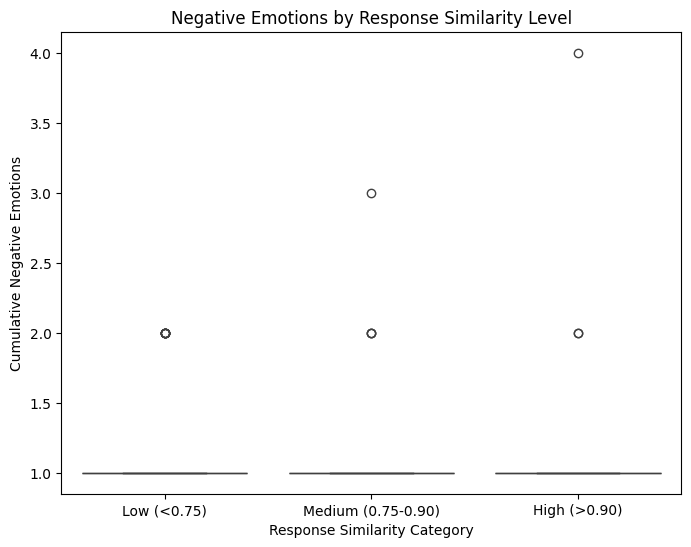

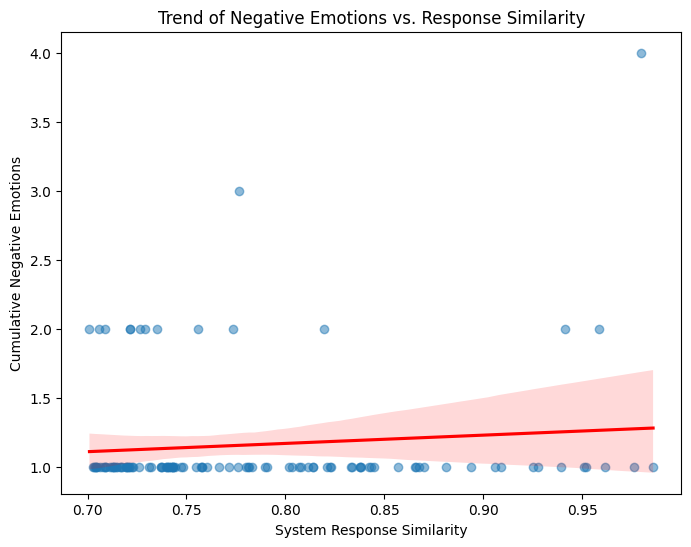

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, ttest_ind, mannwhitneyu

def analyze_response_similarity_vs_negativity(conversations):
    """
    Analyzes whether response similarity correlates with increased negative emotions.
    - Segments conversations into low, medium, and high similarity groups.
    - Performs statistical tests to check for relationships.
    - Visualizes distributions.
    """

    # Extract response similarity and negative emotion count
    similarities = [c['response_similarity'] for c in conversations]
    negative_counts = [c['negative_count'] for c in conversations]

    # Convert to DataFrame
    df = pd.DataFrame({"similarity": similarities, "negative_count": negative_counts})

    # Define similarity thresholds
    df["similarity_category"] = pd.cut(df["similarity"], bins=[0, 0.75, 0.90, 1.0],
                                       labels=["Low (<0.75)", "Medium (0.75-0.90)", "High (>0.90)"])

    # Compute mean and std for each category
    similarity_stats = df.groupby("similarity_category")["negative_count"].agg(["mean", "std", "count"])

    print("\nNegative Emotion Statistics by Response Similarity Level:")
    print(similarity_stats)

    # Statistical tests
    low_group = df[df["similarity_category"] == "Low (<0.75)"]["negative_count"]
    high_group = df[df["similarity_category"] == "High (>0.90)"]["negative_count"]

    t_stat, t_pval = ttest_ind(low_group, high_group, equal_var=False)
    u_stat, u_pval = mannwhitneyu(low_group, high_group, alternative="two-sided")
    spearman_corr, spearman_pval = spearmanr(df["similarity"], df["negative_count"])

    print("\nStatistical Tests:")
    print(f"T-test (Low vs. High Similarity) -> T-statistic: {t_stat:.2f}, p-value: {t_pval:.3f}")
    print(f"Mann-Whitney U Test -> U-statistic: {u_stat:.2f}, p-value: {u_pval:.3f}")
    print(f"Spearman Correlation -> Coefficient: {spearman_corr:.2f}, p-value: {spearman_pval:.3f}")

    # Visualization: Boxplot of negative emotions across similarity levels
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="similarity_category", y="negative_count", data=df, palette="Blues")
    plt.xlabel("Response Similarity Category")
    plt.ylabel("Cumulative Negative Emotions")
    plt.title("Negative Emotions by Response Similarity Level")
    plt.show()

    # Visualization: Scatterplot with regression line
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df["similarity"], y=df["negative_count"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
    plt.xlabel("System Response Similarity")
    plt.ylabel("Cumulative Negative Emotions")
    plt.title("Trend of Negative Emotions vs. Response Similarity")
    plt.show()

# --------------------------
# Usage Example
# --------------------------
analyze_response_similarity_vs_negativity(conversations)


Repetitive responses do not universally cause frustration. The trendline in the scatterplot is almost flat, indicating no clear pattern between similarity and frustration

# 8. Does an Apology Reduce Anger After Repetitive Responses?


Anger Increase After Apology: 0/3 (0.00%)
Anger Increase Without Apology: 2/23 (8.70%)

Chi-Square Test: χ² = 0.00, p-value = 1.000


/tmp/ipykernel_177535/1784361653.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Scenario", y="Anger Increase Rate", data=shift_rates, palette="Reds")


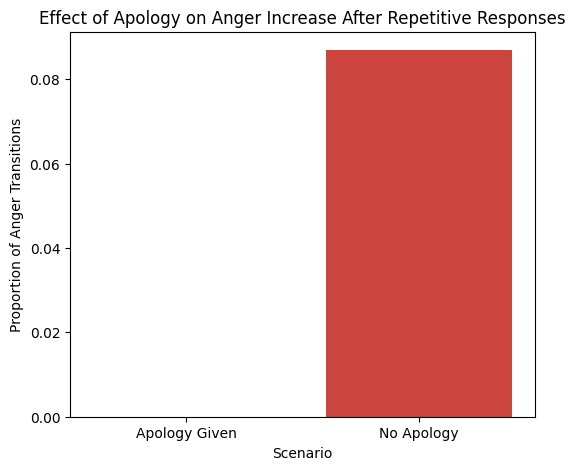

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def analyze_apology_effect_after_repetitive_responses(conversations, similarity_threshold=0.90):
    """
    Analyzes whether an apology reduces anger when responses are highly repetitive.
    - Checks before/after anger levels when an apology follows a high-similarity response.
    - Compares to cases where no apology is given after a high-similarity response.
    - Uses statistical tests to determine significance.
    """
    apology_transitions = []
    no_apology_transitions = []

    for conv in conversations:
        similarities = conv['response_similarity']
        responses = conv['responses']
        emotions = [e['emotion'] for e in conv['emotions']]

        for i in range(len(emotions) - 1):  
            before_emotion = emotions[i]
            after_emotion = emotions[i + 1]
            response_text = responses[i]  # Could be NaN or float

            # Ensure response_text is a string before checking for apology words
            contains_apology = any(apology_word in str(response_text).lower() for apology_word in ["sorry", "apologize", "regret", "mistake"])

            if similarities > similarity_threshold:
                if contains_apology:
                    apology_transitions.append((before_emotion, after_emotion))
                else:
                    no_apology_transitions.append((before_emotion, after_emotion))

    # Convert to DataFrame
    df_apology = pd.DataFrame(apology_transitions, columns=["Before", "After"])
    df_no_apology = pd.DataFrame(no_apology_transitions, columns=["Before", "After"])

    # Count how often anger appears in "After" state
    anger_after_apology = df_apology[df_apology["After"] == "anger"].shape[0]
    anger_after_no_apology = df_no_apology[df_no_apology["After"] == "anger"].shape[0]

    total_apology = df_apology.shape[0]
    total_no_apology = df_no_apology.shape[0]

    print(f"\nAnger Increase After Apology: {anger_after_apology}/{total_apology} ({(anger_after_apology/total_apology)*100:.2f}%)")
    print(f"Anger Increase Without Apology: {anger_after_no_apology}/{total_no_apology} ({(anger_after_no_apology/total_no_apology)*100:.2f}%)")

    # Chi-Square test for significance
    contingency_table = np.array([
        [anger_after_apology, total_apology - anger_after_apology], 
        [anger_after_no_apology, total_no_apology - anger_after_no_apology]
    ])

    chi2_stat, chi2_pval, _, _ = chi2_contingency(contingency_table)

    print(f"\nChi-Square Test: χ² = {chi2_stat:.2f}, p-value = {chi2_pval:.3f}")

    # Visualization: Compare anger shift rates
    shift_rates = pd.DataFrame({
        "Scenario": ["Apology Given", "No Apology"],
        "Anger Increase Rate": [anger_after_apology / total_apology, anger_after_no_apology / total_no_apology]
    })

    plt.figure(figsize=(6, 5))
    sns.barplot(x="Scenario", y="Anger Increase Rate", data=shift_rates, palette="Reds")
    plt.title("Effect of Apology on Anger Increase After Repetitive Responses")
    plt.ylabel("Proportion of Anger Transitions")
    plt.show()

# --------------------------
# Usage Example
# --------------------------
analyze_apology_effect_after_repetitive_responses(conversations, similarity_threshold=0.90)


When an apology was given after a highly similar response, anger did not increase at all (0%). When no apology was given, anger increased in 8.7% of cases.